In [1]:
%load_ext autoreload
%autoreload 2  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import seaborn as sns
from pathlib import Path
import os
basedir = Path('/home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
folder1 = basedir / 'reconstruction/predictions_r1_t500'
folder2 = basedir / 'reconstruction/predictions_r10_t50'
folders = [folder1, folder2][::-1]
names = ["R1_T500", "R10_T50"][::-1]
for folder in os.listdir(basedir / "ddim"):
    if "linear" in folder and "400" not in folder:
        folders.append(basedir / "ddim" / folder)
        names.append("DDIM_" + folder.split("_")[3] + "_" + folder.split("_")[7])
# print name : folder
for name, folder in zip(names, folders):
    print(name, ":", folder)

R10_T50 : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/reconstruction/predictions_r10_t50
R1_T500 : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/reconstruction/predictions_r1_t500
DDIM_500_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_500_nu_0_n100_linear
DDIM_250_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_250_nu_0_n100_linear
DDIM_100_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_100_nu_0_n100_linear
DDIM_50_linear : /home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/ddim/r1_t500_ddim_50_nu_0_n100_linear


In [3]:
dfs = [utils.read_metrics(folder) for folder in folders]
print([len(df) for df in dfs])
dfs[0].head()

[10000, 10000, 10000, 10000, 10000, 10000]


,ligand,QED,SA,Lipinski,Vina,indices
0,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.497384,0.69,5,5.3,0
1,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,None,None,None,6.6,1
2,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.545229,0.63,5,6.3,2
3,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.786829,0.68,5,6.9,3
4,4aaw-A-rec-4ac3-r83-lig-tt-min-0-pocket10_4aaw...,0.326954,0.49,4,6.3,4


R10_T50
metric QED:
QED mean: 0.53, QED std: 0.19, QED max: 0.95, QED min: 0.02
metric SA:
SA mean: 0.68, SA std: 0.12, SA max: 0.99, SA min: 0.24
metric Lipinski:
Lipinski mean: 4.76, Lipinski std: 0.63, Lipinski max: 5.00, Lipinski min: 0.00
metric Vina:
Vina mean: 6.52, Vina std: 2.06, Vina max: 14.50, Vina min: 0.10
R1_T500
metric QED:
QED mean: 0.47, QED std: 0.19, QED max: 0.94, QED min: 0.02
metric SA:
SA mean: 0.62, SA std: 0.12, SA max: 0.99, SA min: 0.23
metric Lipinski:
Lipinski mean: 4.70, Lipinski std: 0.69, Lipinski max: 5.00, Lipinski min: 0.00
metric Vina:
Vina mean: 6.24, Vina std: 1.89, Vina max: 13.80, Vina min: 0.00
DDIM_500_linear
metric QED:
QED mean: 0.45, QED std: 0.19, QED max: 0.94, QED min: 0.02
metric SA:
SA mean: 0.60, SA std: 0.12, SA max: 0.99, SA min: 0.23
metric Lipinski:
Lipinski mean: 4.69, Lipinski std: 0.69, Lipinski max: 5.00, Lipinski min: 0.00
metric Vina:
Vina mean: 6.10, Vina std: 1.79, Vina max: 14.00, Vina min: -0.00
DDIM_250_linear
metric QE

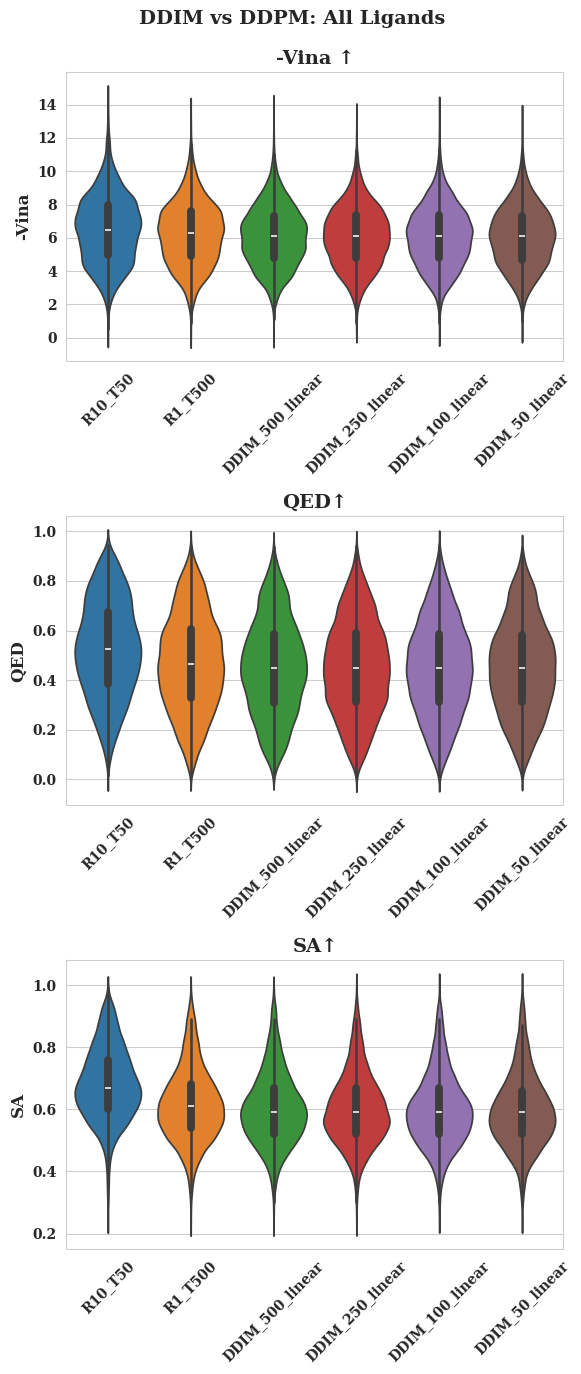

In [4]:
img_dir = Path("/home/domainHomes/ssakharov/master_thesis/imgs")
utils.plot_metrics(dfs, names, rows=3, figsize=(6, 14), suptitle="DDIM vs DDPM: All Ligands", metrics=["Vina", "QED", "SA"], save=img_dir / "ddim_vs_ddpm_all_ligands.pdf")

In [5]:
N = 5
dfs_topN = [
    utils.find_top_N(df.copy(), N) 
    for df in dfs
    ]
names_topN = [name + f'_top{N}' for name in names]
print([len(df) for df in dfs_topN])

Random pocket id: 88, name: 3u5y-B-rec-3u57-dh8-lig-tt-min-0-pocket10_3u5y-B-rec-3u57-dh8-lig-tt-min-0_gen.sdf
Random pocket id: 21, name: 1d7j-A-rec-1tco-fk5-lig-tt-docked-0-pocket10_1d7j-A-rec-1tco-fk5-lig-tt-docked-0_gen.sdf
Random pocket id: 4, name: 4h3c-A-rec-5cqj-53q-lig-tt-docked-2-pocket10_4h3c-A-rec-5cqj-53q-lig-tt-docked-2_gen.sdf
Random pocket id: 17, name: 1e8h-A-rec-1e8h-adp-lig-tt-min-0-pocket10_1e8h-A-rec-1e8h-adp-lig-tt-min-0_gen.sdf
Random pocket id: 36, name: 1r1h-A-rec-1r1h-bir-lig-tt-docked-1-pocket10_1r1h-A-rec-1r1h-bir-lig-tt-docked-1_gen.sdf
Random pocket id: 15, name: 5w2g-A-rec-5w2i-adp-lig-tt-min-0-pocket10_5w2g-A-rec-5w2i-adp-lig-tt-min-0_gen.sdf
[500, 500, 500, 500, 500, 500]


R10_T50_top5
metric QED:
QED mean: 0.75, QED std: 0.13, QED max: 0.94, QED min: 0.27
metric SA:
SA mean: 0.76, SA std: 0.10, SA max: 0.96, SA min: 0.48
metric Lipinski:
Lipinski mean: 4.99, Lipinski std: 0.12, Lipinski max: 5.00, Lipinski min: 4.00
metric Vina:
Vina mean: 8.28, Vina std: 1.79, Vina max: 13.90, Vina min: 4.20
R1_T500_top5
metric QED:
QED mean: 0.74, QED std: 0.12, QED max: 0.94, QED min: 0.22
metric SA:
SA mean: 0.70, SA std: 0.10, SA max: 0.95, SA min: 0.39
metric Lipinski:
Lipinski mean: 4.99, Lipinski std: 0.15, Lipinski max: 5.00, Lipinski min: 2.00
metric Vina:
Vina mean: 7.93, Vina std: 1.66, Vina max: 13.80, Vina min: 3.80
DDIM_500_linear_top5
metric QED:
QED mean: 0.73, QED std: 0.13, QED max: 0.94, QED min: 0.14
metric SA:
SA mean: 0.69, SA std: 0.10, SA max: 0.95, SA min: 0.39
metric Lipinski:
Lipinski mean: 4.99, Lipinski std: 0.11, Lipinski max: 5.00, Lipinski min: 4.00
metric Vina:
Vina mean: 7.82, Vina std: 1.63, Vina max: 14.00, Vina min: 3.40
DDIM_250_li

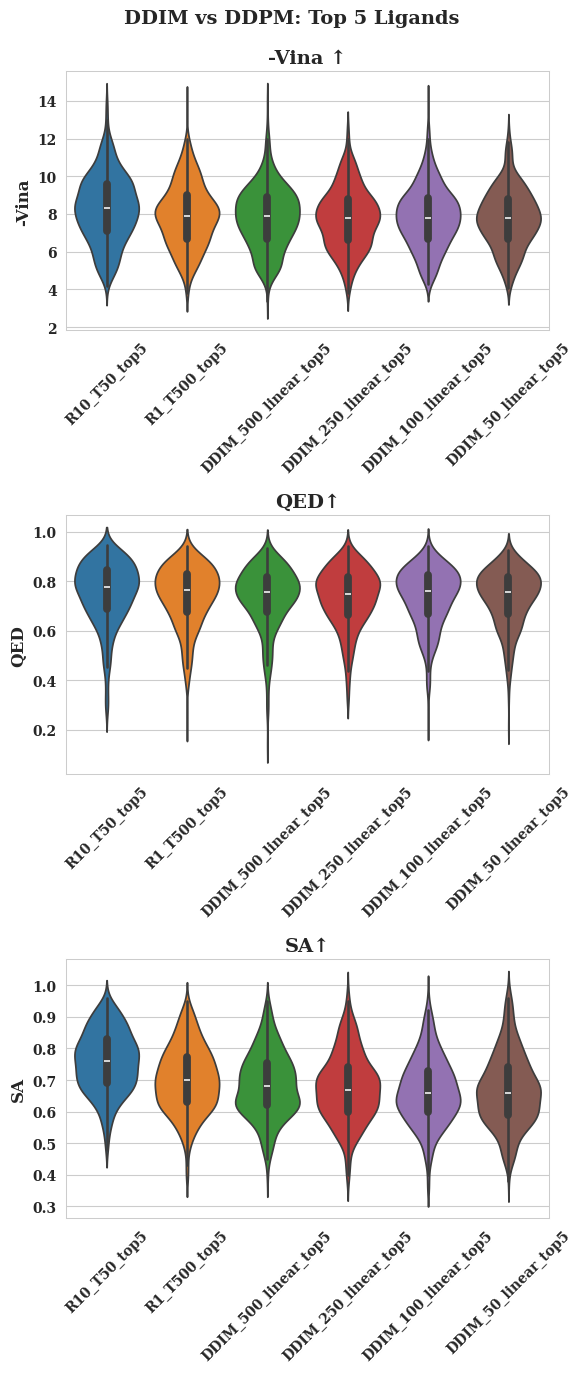

In [6]:
utils.plot_metrics(dfs_topN, names_topN, rows=3, figsize=(6, 14), suptitle="DDIM vs DDPM: Top 5 Ligands", metrics=["Vina", "QED", "SA"], save=img_dir / "ddim_vs_ddpm_top5_ligands.pdf")

In [7]:
mols = [utils.read_molecules(folder) for folder in folders]
len(mols), len(dfs_topN), len(names_topN)

(6, 6, 6)

In [22]:
true_mols_dir = Path("/home/domainHomes/ssakharov/master_thesis/crossdocked/processed_crossdock_noH_ca_only_temp/test")
indices = [0, 1, 5]
dfs_to_plot = [dfs_topN[i] for i in indices]
names_to_plot = [names_topN[i] for i in indices]
mols_to_plot = [mols[i] for i in indices]
utils.plot_mols(mols_to_plot, dfs_to_plot, names_to_plot, true_mols_dir=true_mols_dir)

File: 1gg5-A-rec-1kbo-340-lig-tt-min-0-pocket10_1gg5-A-rec-1kbo-340-lig-tt-min-0_gen.sdf
Rows: 3, Cols: 6
3
row 0: R10_T50_top5
row 1: R1_T500_top5
row 2: DDIM_50_linear_top5


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

['R10_T50', 'R1_T500', 'DDIM_500_linear', 'DDIM_250_linear', 'DDIM_100_linear', 'DDIM_50_linear']


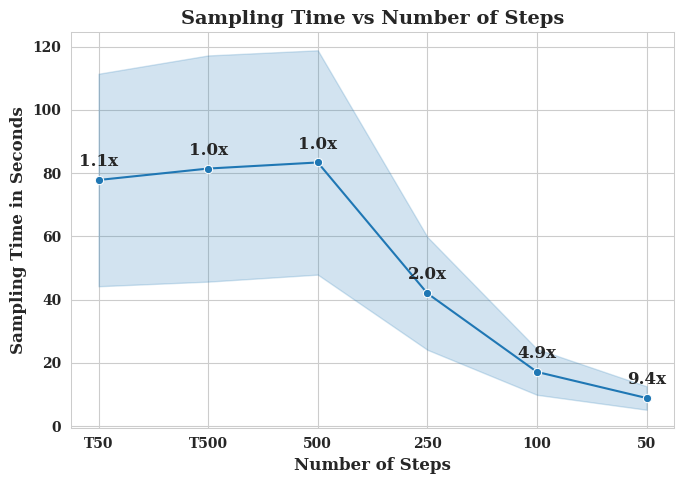

In [ ]:
dfs_times = [utils.read_times(folder) for folder in folders]
names_times = names
print(names_times)
utils.plot_times(dfs_times, names_times, figsize=(7,5), save=img_dir / "ddim_times.pdf")

In [ ]:
dfs_times[0]

,ligand,time,step
0,/home/domainHomes/ssakharov/master_thesis/cros...,104.203498,T50
1,/home/domainHomes/ssakharov/master_thesis/cros...,94.505259,T50
2,/home/domainHomes/ssakharov/master_thesis/cros...,98.412272,T50
3,/home/domainHomes/ssakharov/master_thesis/cros...,121.986134,T50
4,/home/domainHomes/ssakharov/master_thesis/cros...,103.678210,T50
...,...,...,...
95,/home/domainHomes/ssakharov/master_thesis/cros...,65.762961,T50
96,/home/domainHomes/ssakharov/master_thesis/cros...,72.489047,T50
97,/home/domainHomes/ssakharov/master_thesis/cros...,88.800124,T50
98,/home/domainHomes/ssakharov/master_thesis/cros...,138.701991,T50


In [ ]:
for df, name in zip(dfs_times, names_times):
    utils.print_df_info(df, name, metrics=["time"])

R10_T50
metric time:
time mean: 77.85, time std: 33.60, time max: 161.02, time min: 25.75
R1_T500
metric time:
time mean: 81.47, time std: 35.76, time max: 167.67, time min: 27.97
DDIM_500_linear
metric time:
time mean: 83.40, time std: 35.47, time max: 170.78, time min: 26.91
DDIM_250_linear
metric time:
time mean: 42.00, time std: 17.84, time max: 85.98, time min: 13.68
DDIM_100_linear
metric time:
time mean: 17.16, time std: 7.23, time max: 35.01, time min: 5.62
DDIM_50_linear
metric time:
time mean: 8.91, time std: 3.71, time max: 18.04, time min: 3.01


In [ ]:
dfs_times[0]["time"].mean()

77.85057627916336